In [2]:
from OFDM import *
%matplotlib inline

IndentationError: expected an indented block (OFDM.py, line 164)

In [2]:
# Create random bit stream, bits are length 10x OFDM symbol length - 0's

ofdm_symbol_size = 1024
cp_length = ofdm_symbol_size // 8
modulation = "QPSK"

In [9]:
tx = transmitter(ofdm_symbol_size, cp_length, modulation)
no_bits = tx.bits_per_symbol * 50

bits = np.random.binomial(n=1, p=0.5, size=(no_bits, ))

known_bits = np.random.binomial(n=1, p=0.5, size=(tx.bits_per_symbol, ))
tx.pilot_sequence = known_bits

signal = tx.transmit(bits, graph_output=False)

------------------------------------------
TRANSMIT
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      511 
Cyclic prefix length:               128 
Modulation method:                  QPSK
Number of bits to transmit:         51100
Number of OFDM symbols to transmit: 51


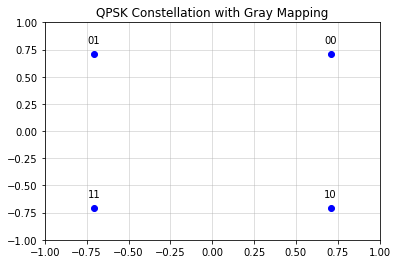

In [4]:
tx.graphs()

In [5]:
signal_rx = play_record(signal, tx.fs)
#scipy.io.wavfile.write(r"sound_files/signal.wav", tx.fs, signal)

Recording...
Finished recording


------------------------------------------
Receive 
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      511 
Cyclic prefix length:               128 
Modulation method:                  QPSK
90519
Number of received OFDM symbols:    51
Number of received bits:            51100


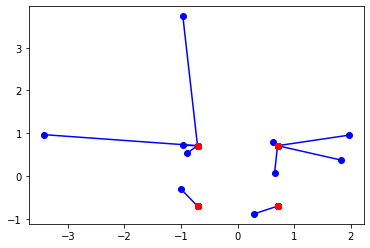

In [6]:
rx = receiver(ofdm_symbol_size, cp_length, modulation, pilot_sequence= known_bits)

rx_bits = rx.receive(signal_rx)
#rx.graphs()

In [7]:
errs = np.sum(abs(bits-rx_bits[:len(bits)]))
errs/len(bits)

0.067005870841487278

------------------------------------------
Measure Channel
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      511 
Cyclic prefix length:               128 
Modulation method:                  QPSK
Recording...
Finished recording
90882


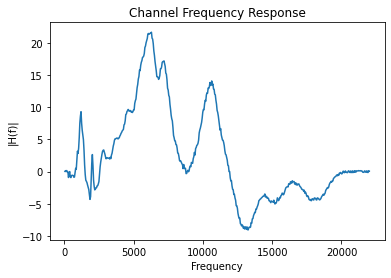

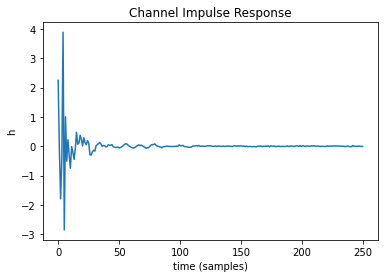

In [8]:
ch = channel(ofdm_symbol_size, cp_length, modulation)
H, h = ch.measure_channel(bits)

In [8]:
signal, sync = rx.get_symbols(signal)

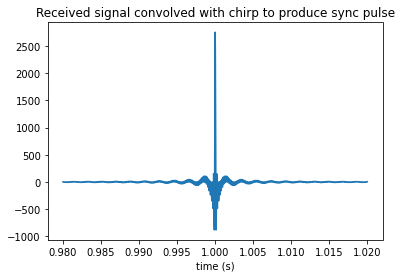

In [25]:
time = np.linspace(0, len(sync)/rx.fs, len(sync))
start = int(rx.fs * 0.98)
end = int(rx.fs * 1.02)

plt.plot(time[start:end],sync[start:end])
plt.xlabel("time (s)")
plt.title("Received signal convolved with chirp to produce sync pulse")
plt.savefig("plots/sync_pulse")

In [ ]:
x = np.arange